## Introduction to Image Manipulation in R

With the rise of Smartphone and Social Media usage, Data shared across the Internet have become more of unstructured in the form of Text (Natural Language), Images and Videos. So it is important for us to be equipped with  sophisticated tools for such Data Processing and Data Manipulation. 

**ImageMagick** is one such tool and in fact, one of the most comprehensive open-source image processing library that supports over 200 image file formats (like: png, jpeg, tiff, pdf) and can display, convert and edit raster image and vector image files. Jeroen Ooms has been kind enough to develop an R package, `magick` that wraps the [ImageMagick ST](https://www.imagemagick.org/Magick++/STL.html) library. Thus, R-package `magick` tries to help R users in advanced Image processing (in R). 

### Installation on Windows and OSX

Since `magick` is available on CRAN, installing `magick` is as straightforward as installing any other R-package with `install.packages()`

In [6]:
install.packages('magick')

Also, the development version of `magick` is available on `ropensci`'s github repo and could be installed with `install_github()` of `devtools` package. 

In [7]:
devtools::install_github("ropensci/magick")

Please note that for installing from source (the development version from Github), The destination workstation requires RTools.exe to build the source and also note that the binary CRAN packages work out of the box and have most important features enabled which makes installing from CRAN a preferable option. 

### Installation on Linux

On Linux you need to install the ImageMagick++ library: on Debian/Ubuntu this is called [libmagick++-dev](https://packages.debian.org/testing/libmagick++-dev):

In [8]:
sudo apt-get install libmagick++-dev

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: sudo apt
         ^


On Fedora or CentOS/RHEL we need ImageMagick-c++-devel:

In [ ]:
sudo yum install ImageMagick-c++-devel

Once the installation is successful, the library `magick` can be loaded into the current R session using `library()` function.

In [9]:
library(magick)

### Reading, Viewing and Writing Image files 

`magick` supports reading image files from both the local computer or a url on Internet using `image_read()` function.

In [10]:
#from URL
#image_read("https://jeroen.github.io/images/frink.png")
#from Local Computer
inp_img <- image_read('C:/Users/SA31/Pictures/cat.jpg')

Once the image is read into R, the basic information of the image such as *image format*, *dimension* and *file size* can be extracted using `image_info()` function

In [11]:
image_info(inp_img)

format,width,height,colorspace,filesize
JPEG,256,240,sRGB,18287


If you are using RStudio (or any other editor with in-built browser), the read image (`inp_img`) is automatically displayed in the Viewer after every exeuction or simply mentioning the image object name (`inp_img`). In other cases, to view the image, functions like `plot()` or `print()` should be wrapped around the magick object to display the image.

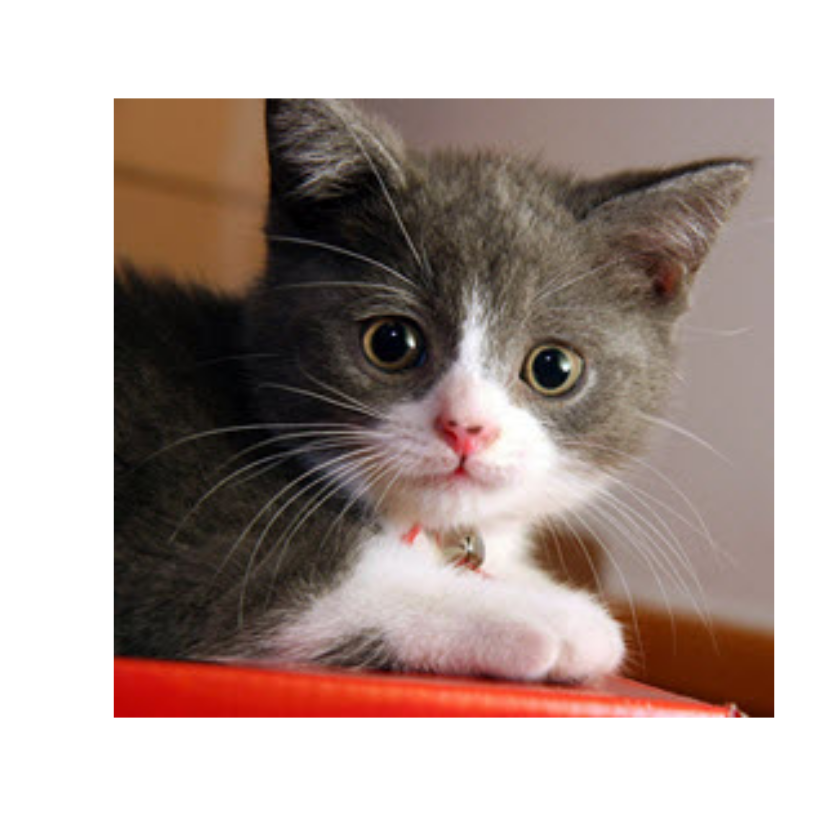

In [12]:
plot(inp_img)

Also, the same magick object could be viewed in the default photoviewer application of your system using `image_browse()` 

In [13]:
image_browse(inp_img)

Similar to `image_read()` for reading image files into R, `image_write()` is the function that helps in writing/saving image file of desired image format. The first argument of `image_write()` is the `magick` *image object* into which the `image_read()` output was saved - in our case `inp_img` and the second argument is the *path* along with the file name where the image has be written/saved and the third argument is the image *format* in which the image has to be written/saved - like `png` or `svg`. 

While `image_write()` can be used for image format conversion - like from `.jpeg` to `.png`, `magick` has got `image_convert()` which also performs the same image conversion but saves the `image` object in the memory (the current session) unlike `image_write()` that writes/saves the image object to an external file. 

In [14]:
#converting the existing jpeg format image into png
inp_img_png <- image_convert(inp_img, format = 'png') 

#checking the image format of this new object
image_info(inp_img_png)

format,width,height,colorspace,filesize
PNG,256,240,sRGB,0


As the above output suggests, `image_convert()` has successfully converted the input `jpeg` formatted image object into `png` format but has saved it in memory (in a new R object `inp_img_png`). And to write the same to an external file, Let us use `image_write()`

In [15]:
image_write(inp_img, path = 'C:/Users/SA31/Pictures/cat.png', format = 'png') 

### Applying Enhancements, Filters and Effects

While dealing with Images, Most of times it is required to apply enhancements/filter/effects to the existing raw Images, in order to improve the way the image looks or to bring it to the desired state. Of all such enhancements, One prime requirement is the ability to play with the color of the image changing paramaters like Brightness, Contrast, Hue. 

`image_modulate()` 

In [23]:
# Brightness, Saturation, Hue
mod_img <- image_modulate(inp_img, brightness = 120, contrast = 20, hue = 20)
plot(mod_img)

ERROR: Error in image_modulate(inp_img, brightness = 120, contrast = 20, hue = 20): unused argument (contrast = 20)
